<a href="https://colab.research.google.com/github/alupo933/Food-Sales-Predictions/blob/main/Food_Sales_Predicitons_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
%load_ext google.colab.data_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename='/sales_predictions.csv'
food_sales = pd.read_csv(filename)
print(food_sales)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ... 

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
food_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [258]:
food_sales.shape

(8523, 12)

In [259]:
food_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [260]:
food_sales.duplicated().any()
# There are no duplicated columns

False

In [261]:
food_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [262]:
food_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [263]:
food_sales[food_sales.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [264]:
# 5 replace missing data
# I replaced the Item weight NAN's with the average weight of the column
# food_sales['Item_Weight'].fillna(value = food_sales['Item_Weight'].mean(), inplace=True)

# (This step got replaced later on with ML and Train Test Split using Imputer)

In [265]:
food_sales.shape

(8523, 12)

In [266]:
food_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [267]:
food_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [268]:
food_sales.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
food_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [269]:
food_sales['Item_Type'].value_counts()
# no Irregularities

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [270]:
food_sales['Outlet_Type'].value_counts()
# no irregularities

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [271]:
food_sales['Item_Weight'].mean()

12.857645184136183

In [272]:
food_sales['Item_Weight'].min()

4.555

In [273]:
food_sales['Item_Weight'].max()

21.35

In [274]:
food_sales.agg(
    {
        'Item_Weight':['min','max', 'mean'],
        'Item_Visibility':['min','max', 'mean'],
        'Item_MRP':['min','max', 'mean'],
        'Outlet_Establishment_Year':['min','max', 'mean'],
        'Item_Outlet_Sales':['min','max', 'mean']
    }
)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914


In [275]:
food_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [276]:
food_sales.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


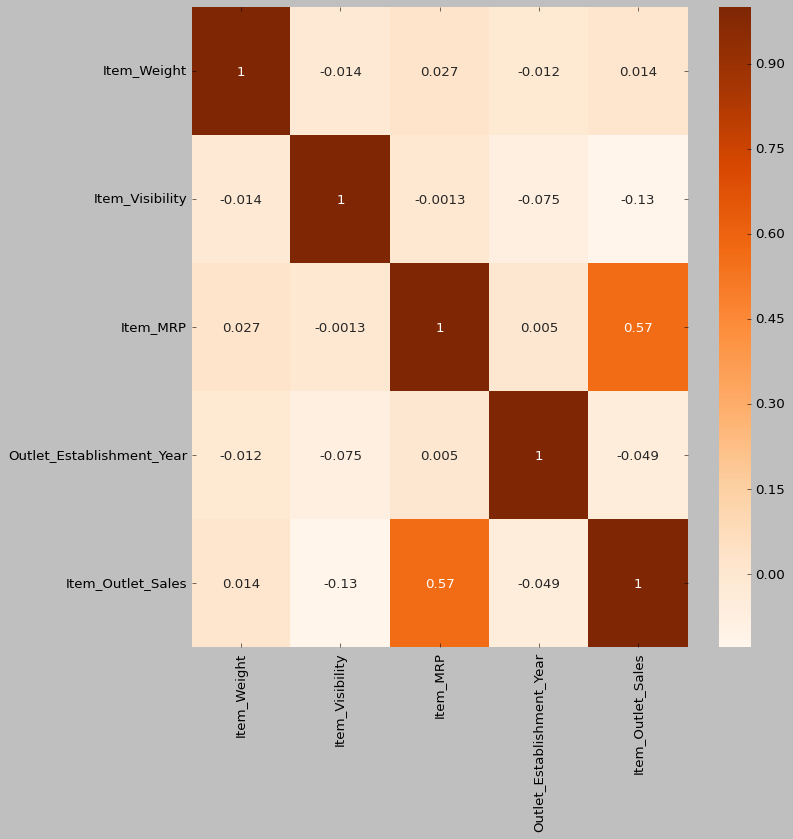

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=food_sales.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True);

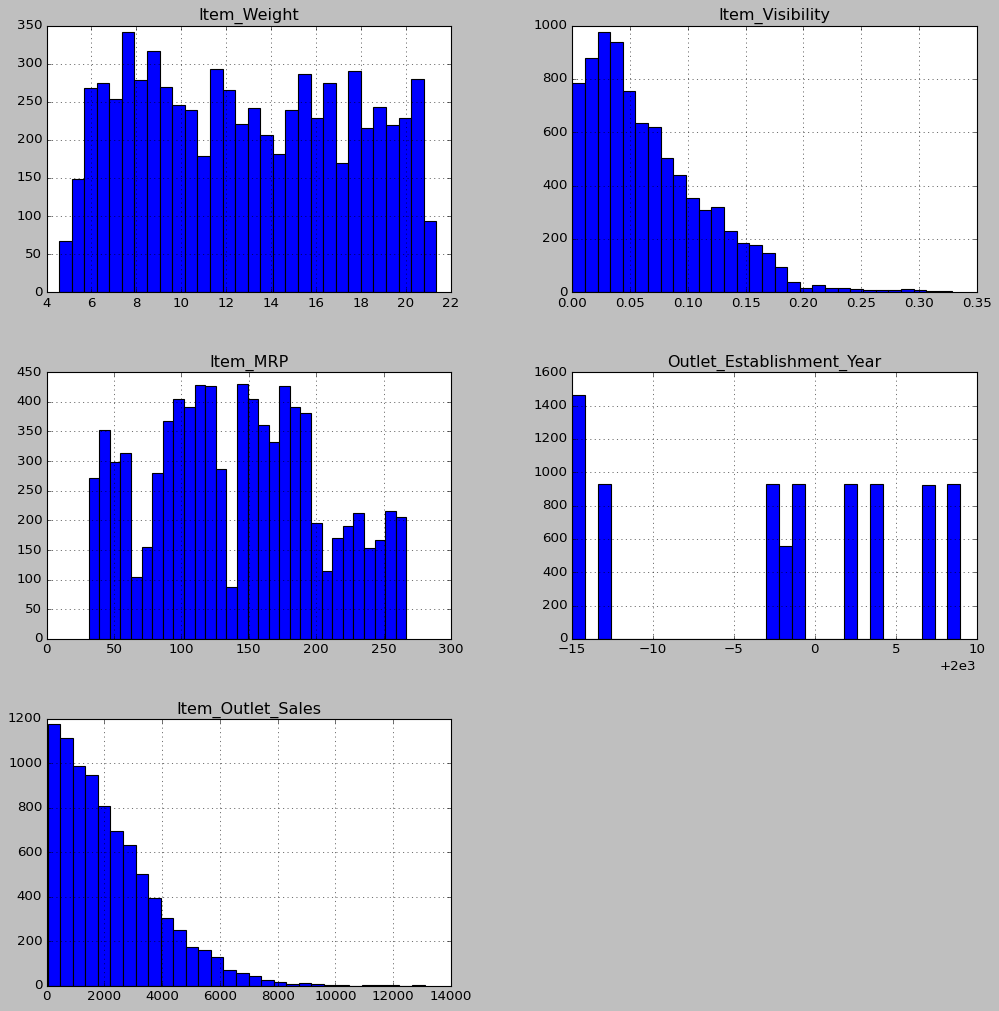

In [278]:
food_sales.hist(bins = 30, figsize = (15,15))
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset = False, style = 'plain');

Item outlet sales and Item MRP have a positive correlation


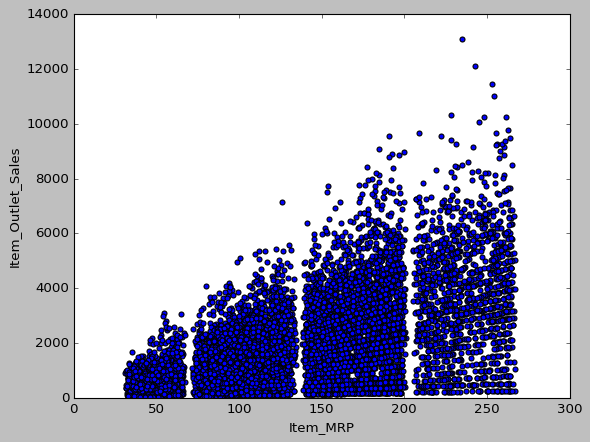

In [279]:
food_sales.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales');
plt.ylim(0,14000)
print('Item outlet sales and Item MRP have a positive correlation')

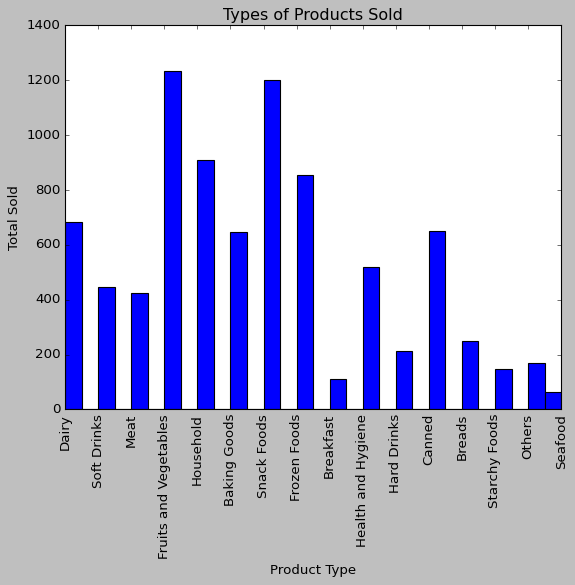

With more bins we see more clearly that the top two selling categories are Fruits & Vegetables and Snack Foods


In [280]:
item_type=food_sales['Item_Type']
plt.xticks(rotation=90)
plt.hist(item_type, bins = 30)
plt.xlabel('Product Type')
plt.ylabel('Total Sold')
plt.title('Types of Products Sold')
plt.show()
print('With more bins we see more clearly that the top two selling categories are Fruits & Vegetables and Snack Foods');

Here we can see the median MRP of all the ITem Types sold are relatively the same, but the mean of Baking goods, Frozen Foods, and Health & Hygene Items are lower than the others


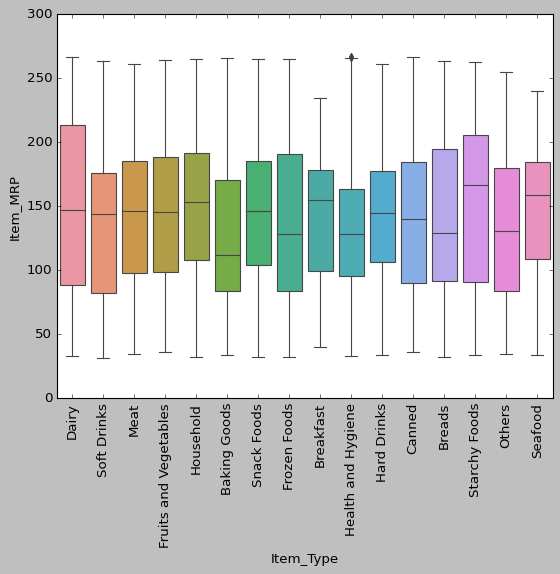

In [281]:
sns.boxplot(x='Item_Type', y='Item_MRP', data=food_sales);
plt.xticks(rotation=90);
print('Here we can see the median MRP of all the ITem Types sold are relatively the same, but the mean of Baking goods, Frozen Foods, and Health & Hygene Items are lower than the others')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


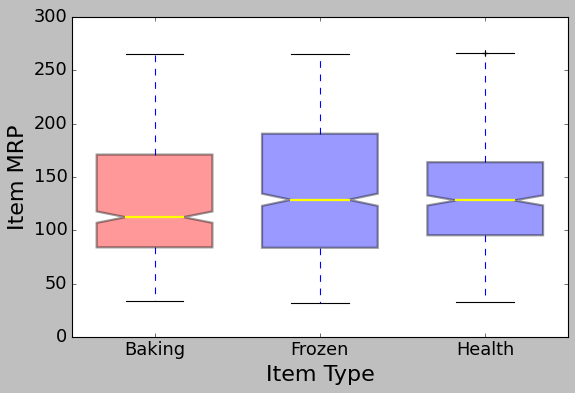

In [282]:
Baking = food_sales.loc[food_sales['Item_Type']=='Baking Goods','Item_MRP']
Frozen = food_sales.loc[food_sales['Item_Type']=='Frozen Foods','Item_MRP']
Health = food_sales.loc[food_sales['Item_Type']=='Health and Hygiene','Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Baking,Frozen,Health],
           notch = True,
           labels=['Baking', 'Frozen', 'Health'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item Type', fontsize = 20);
plt.ylabel('Item MRP', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
# Here we can get a closer comparison of the 3 Item Types that have the lowest Item MRP Means: Baking Goods, Frozen Foods and Health & Hygiene products

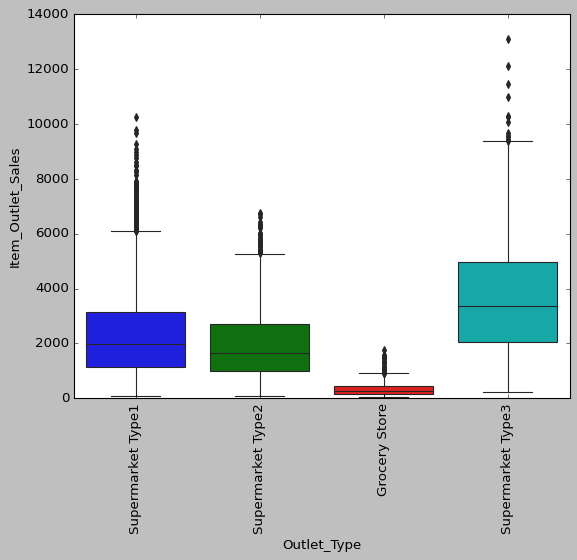

In [283]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=food_sales);
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


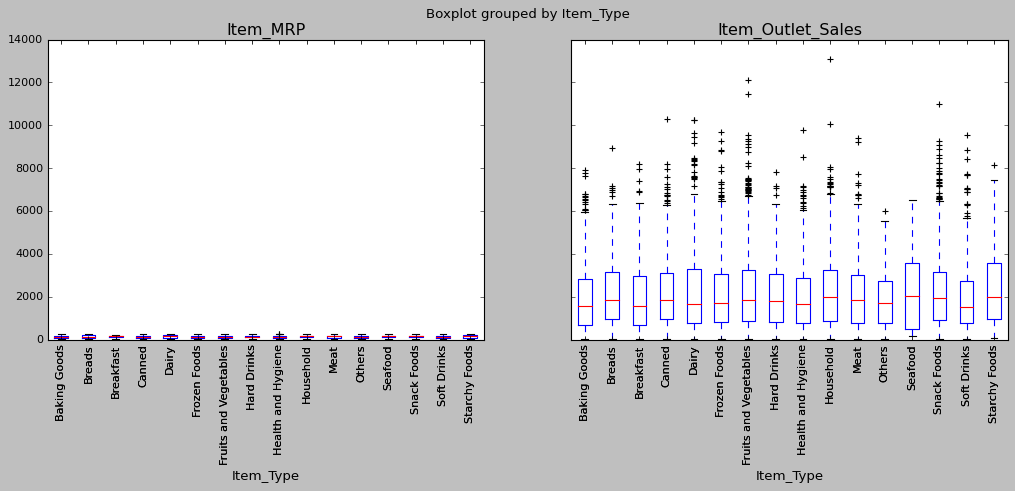

In [284]:
food_sales.boxplot(['Item_MRP', 'Item_Outlet_Sales'],
               by = 'Item_Type',
               figsize = (15,5),
               fontsize = 10,
               rot=90,
               grid=False,
               );

plt.show()
# Here we can see there is a significant increase in the average price of the Item MRP and the Item Outlet Sales

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


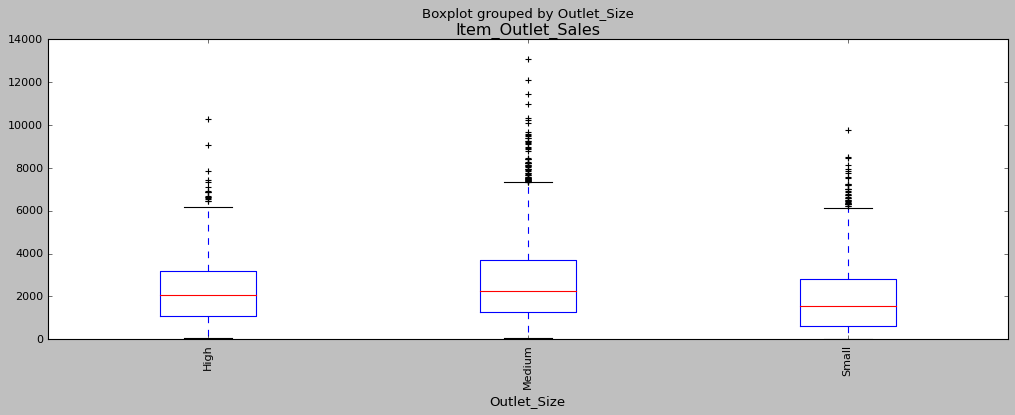

In [285]:
food_sales.boxplot(['Item_Outlet_Sales'],
               by = 'Outlet_Size',
               figsize = (15,5),
               fontsize = 10,
               rot=90,
               grid=False,
               );

plt.show();
# Here we can see the item sales by size of the Outlets

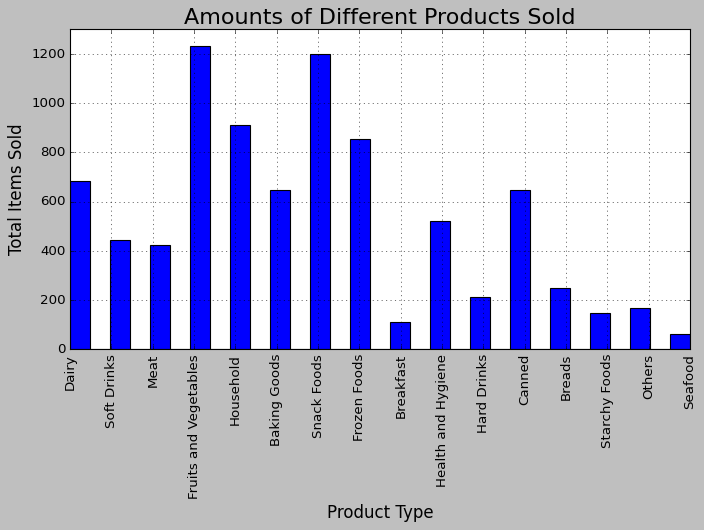

With more bins we see more clearly that the top two selling categories are Fruits & Vegetables and Snack Foods


In [286]:
plt.style.use('classic')
plt.figure(figsize=(10,5))
bar_width=0.5
item_type=food_sales['Item_Type']
plt.xticks(fontsize=12,rotation=90)
plt.hist(item_type, bins = 31)
plt.ylim(0,1300)
plt.xlabel('Product Type',fontsize=15)
plt.ylabel('Total Items Sold',fontsize=15)
plt.title('Amounts of Different Products Sold',fontsize=20)
plt.grid()

plt.show()
print('With more bins we see more clearly that the top two selling categories are Fruits & Vegetables and Snack Foods');

In [287]:
sold_at=food_sales.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
sold_at

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

here we can see which outlet type has the highest average sales


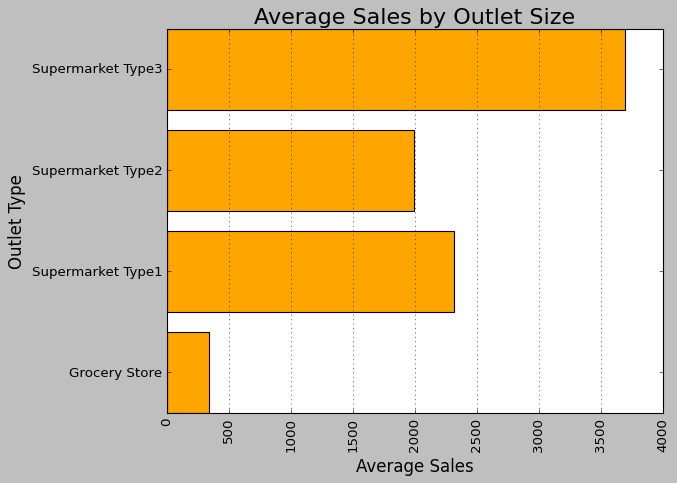

In [288]:
plt.barh(sold_at.index,sold_at.values, color='orange')
bar_width=0.35
plt.ylabel('Outlet Type', fontsize=15)
plt.xlabel('Average Sales', fontsize=15)
plt.title('Average Sales by Outlet Size', fontsize=20)
plt.xticks(rotation=90,fontsize=12);
plt.grid(axis='x')
print("here we can see which outlet type has the highest average sales")

In [289]:
food_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [290]:
item_sales=food_sales['Item_Outlet_Sales'].mean()
item_sales

2181.2889135750365

In [291]:
est_year=food_sales.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
est_year.value_counts()

2438.841866    1
1995.498739    1
2340.675263    1
2348.354635    1
2298.995256    1
2483.677474    1
2192.384798    1
339.351662     1
2277.844267    1
Name: Item_Outlet_Sales, dtype: int64

In [292]:
sales=food_sales['Item_Outlet_Sales']
sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

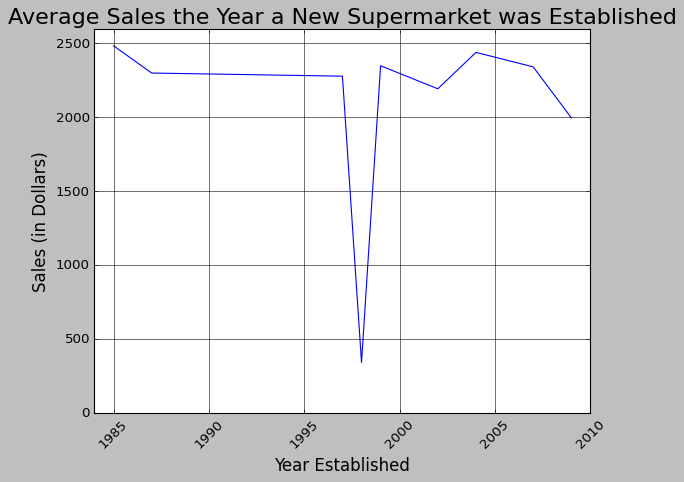

In [293]:
plt.plot(est_year.index,est_year)
plt.xlim(1984,2010)
plt.ylim(0,2600)
plt.xlabel('Year Established',fontsize=15)
plt.ylabel('Sales (in Dollars)',fontsize=15)
plt.title('Average Sales the Year a New Supermarket was Established',Fontsize=20)
plt.ticklabel_format(useOffset=False)
plt.grid(linestyle='-')
plt.xticks(rotation=45,);

In [294]:
# Import Machine Learning sklearn libraries
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [295]:
food_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Next We'll check the catagorical columns for unique values


In [296]:
print('Unique Item IDs', food_sales['Item_Identifier'].unique())
print('/n')
print('Unique Item Fat Content', food_sales['Item_Fat_Content'].unique())
print('/n')
print('Unique Item Types', food_sales['Item_Type'].unique())
print('/n')
print('Unique Outlet ID', food_sales['Outlet_Identifier'].unique())
print('/n')
print('Unique Outlet Size', food_sales['Outlet_Size'].unique())
print('/n')
print('Unique Outlet Location Type', food_sales['Outlet_Location_Type'].unique())
print('/n')
print('Unique Outlet Type', food_sales['Outlet_Type'].unique())
print('/n')

Unique Item IDs ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
/n
Unique Item Fat Content ['Low Fat' 'Regular']
/n
Unique Item Types ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
/n
Unique Outlet ID ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
/n
Unique Outlet Size ['Medium' nan 'High' 'Small']
/n
Unique Outlet Location Type ['Tier 1' 'Tier 3' 'Tier 2']
/n
Unique Outlet Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
/n


## Part 5: Machine Learning Predictions
#The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

## Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [297]:
X = food_sales.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y = food_sales['Item_Outlet_Sales']

##Perform a train test split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Create a pre processing pipeline to prepare the dataset for Machine Learning

In [299]:
# first we'll look at the dtypes and column info
# We see below we have NAN's in Outlet_size and Item Weight
food_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Now I'll use the make_column_selector to select the categorical colums and the numeric colums



In [300]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

## Next I'll instantate all the transformers

In [301]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scalar = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

##Next is making a pipeline for Numeric Columns. 

I want to apply two transformations to the numeric data.
- first I want to impute the missing values with the mean value and second I want to scale the data.

In [302]:
num_pipe = make_pipeline(mean_imputer, scalar)

## The second pipeline is for the Categorical columns. I am going to first input the missing data witht hte most frequent, then I am going to OneHotEncode the categorical data afterwards.

In [303]:
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

In [304]:
# Next I will match the columns with the appropriate Pre-Processing pipeline
number_tuple = (num_pipe, num_selector)
category_tuple = (cat_pipe, cat_selector)

In [305]:
# Next I will match the pairs to the column Transformer
column_transformer = make_column_transformer(number_tuple, category_tuple)

In [306]:
# Now i will instantiate the linear regression
line_reg = LinearRegression()

In [307]:
# time to make the pipeline
pipe = make_pipeline(column_transformer, line_reg)

In [308]:
# Now I will fit the pipeline
from sklearn import set_config

set_config(display='diagram')
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb9f3ef9490>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb9f3ef91d0>)])),
                ('linearregression', LinearRegression())])

##Now it's time to find the R^2 value of your model for both the training and test sets

In [309]:
# score the training
pipe.score(X_train, y_train)

0.5615527181926836

In [310]:
# Score the Testing
pipe.score(X_test, y_test)

0.567134117820512

In [311]:
from sklearn.metrics import mean_absolute_error

# Now its time to creat predictions from the model on the training data
training_predictions = pipe.predict(X_train)

#Evaluate the model's preiction on the Training Set
# Use the Mean Absolue Error Metric
training_mae = mean_absolute_error(y_train, training_predictions)
print(f'MAE of the training set is {training_mae: .2f} outlet sales')

MAE of the training set is  847.08 outlet sales


In [312]:
# Now its time to creat predictions from the model on the testing data
testing_predictions = pipe.predict(X_test)

#Evaluate the model's preiction on the Testing Set
# Use the Mean Absolue Error Metric
testing_mae = mean_absolute_error(y_test, testing_predictions)
print(f'MAE of the testing set is {testing_mae: .2f} outlet sales')

MAE of the testing set is  804.04 outlet sales


In [313]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [322]:
def evaluate_model(y_true, y_pred):
  """takes two arrays, true labels and predicted labels, and prints
  MAE, MSE, RMSE, and R2 metrics"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f'MAE {mae}\n MSE {mse}\n R^2 {r2}\n RMSE {rmse}')

In [318]:
dummy = DummyRegressor(strategy='mean')
dummy_pipe = make_pipeline(column_transformer, dummy)
dummy_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb9f3ef9490>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb9f3ef91d0>)])),
                ('dummyregressor', DummyRegressor())])

In [323]:
# Evaluate Dummy Regression Model to get a Reference for the Training Data
evaluate_model(y_train, dummy_pipe.predict(X_train))


MAE 1360.2184410159132
 MSE 2959455.7045265585
 R^2 0.0
 RMSE 1720.306863477141


In [324]:
# Evaluate Dummy Regression Model to get a Reference for the Testing Data
evaluate_model(y_test, dummy_pipe.predict(X_test))

MAE 1326.121044678208
 MSE 2772144.4627103633
 R^2 -0.004772483978719766
 RMSE 1664.9758144520788


In [315]:
from sklearn.tree import DecisionTreeRegressor

In [316]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [319]:
dec_tree_pipe = make_pipeline(column_transformer, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb9f3ef9490>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb9f3ef91d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [326]:
# Evaluate Training of Decision Tree Model
evaluate_model(y_train, dec_tree_pipe.predict(X_train))

MAE 0.0
 MSE 0.0
 R^2 1.0
 RMSE 0.0


In [327]:
# Evaluate Testing of Decision Tree Model
evaluate_model(y_test, dec_tree_pipe.predict(X_test))

MAE 1038.3921153449085
 MSE 2227140.4856979116
 R^2 0.19276592252469948
 RMSE 1492.3607089768584


In [328]:
# Evaluate training of Linear Regression Model
evaluate_model(y_train, pipe.predict(X_train))

MAE 847.0849474342929
 MSE 1297565.309278826
 R^2 0.5615527181926836
 RMSE 1139.107242220339


In [329]:
# Evaluate Testing of Linear Regression Model
evaluate_model(y_test, pipe.predict(X_test))

MAE 804.0386963866729
 MSE 1194267.1375995984
 R^2 0.567134117820512
 RMSE 1092.825300585413
